In [212]:
import sqlalchemy
import pymysql
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
import sqlite3

In [213]:
dialect = 'sqlite'
user = 'root'
password = 'Q1w2e3r4t5!'
host = 'localhost'
port = 3306
database = 'hawaii.sqlite'

engine = create_engine(f'{dialect}:///{database}')

In [214]:
start_date = '2017-07-08'
end_date = '2017-07-22'

In [215]:
Base = automap_base()
Base.prepare(engine, reflect=True)

Base.classes.keys()

['measurement', 'station']

In [216]:
session = Session(bind=engine)

In [217]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
hawaii_station = session.query(Station).filter_by().all()

for row in hawaii_station:
    print(row.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


# Precipitation Analysis

In [11]:
last_year = session.query(Measurement).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <='2017-08-23')

last_year.count()

2230

In [149]:
results = []
for rows in last_year:
    print(rows)
    results_dict = {}
    results_dict['date'] = rows.date
    results_dict['prcp'] = rows.prcp
    results.append(results_dict)
    #return jsonify(results)

results

[{'date': '2016-08-23', 'prcp': 0.0},
 {'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': 0.0},
 {'date': '2016-09-06', 'prcp': 0.0},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05},

In [10]:
precip_df = pd.DataFrame(columns  = ['date', 'precip'])

In [13]:
date = []
prcp = []

for row in last_year:
    date.append(row.date)
    prcp.append(row.prcp)
    #tobs.append(row.tobs)

In [14]:
precip_df['date'] = date
precip_df['precip'] = prcp

In [15]:
precip_df.head(10)

,date,precip
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [272]:
precip_df.plot(x = precip_df['date'], rot = 45, ylim = (0,8), figsize=(20,12), xticks = np.arange(100,2230,150), linewidth = 13)
plt.xlabel("Dates", fontsize = 20)
plt.ylabel("Total Precipitation", fontsize= 20)
plt.title("Precipitation Analysis", fontsize = 24)
plt.legend(loc='best')

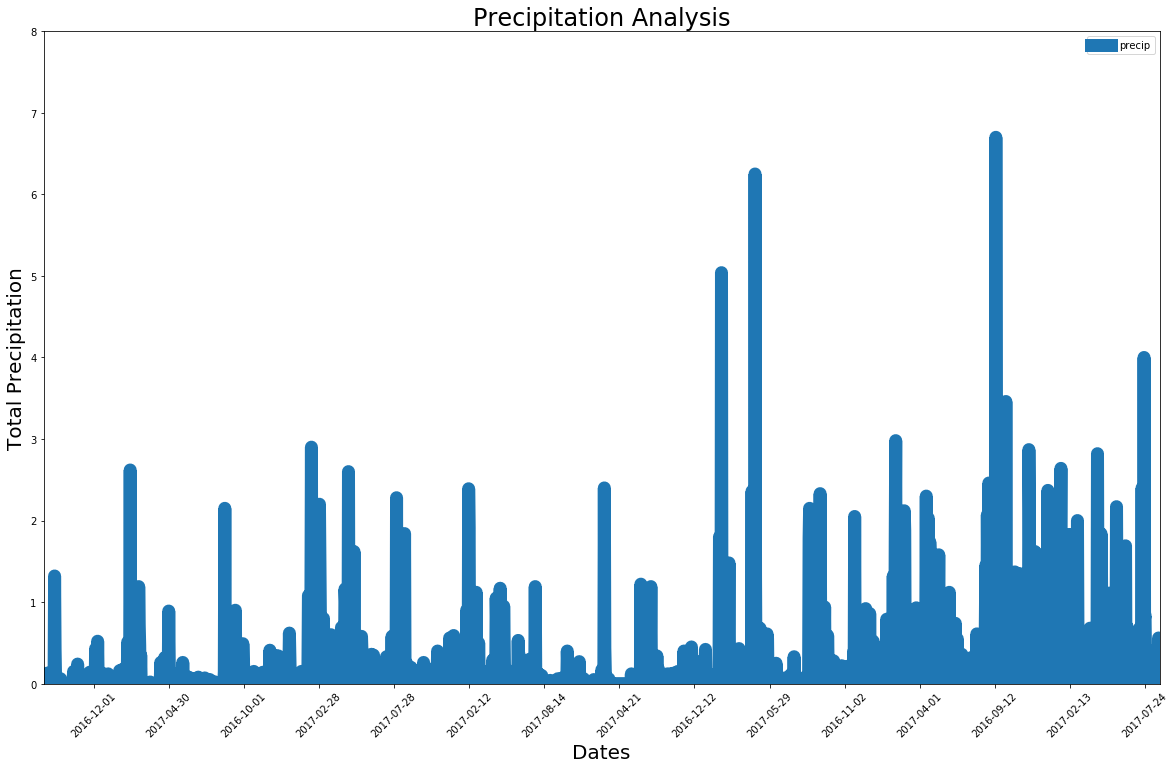

In [273]:
plt.show()

# Station Activity Analysis

In [158]:
active_stations = session.query(Station).all()
for row in active_stations:
    print(row.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [40]:
tobs_stations = session.query(Measurement.station, func.sum(Measurement.tobs)).group_by(Measurement.station)\
.order_by(func.sum(Measurement.tobs).desc())

In [48]:
#for row in tobs_stations:
print("The station with the highest temperature observations is %s with a total of %s observations." % (tobs_stations[0][0], tobs_stations[0][1]))

The station with the highest temperature observations is USC00519397 with a total of 203083.0 observations.


In [63]:
#session = Session(bind=engine)
conn = sqlite3.connect('hawaii.sqlite')
cur = conn.cursor()

In [68]:
tobs_df = pd.read_sql(tobs_stations[0], con =conn)

DatabaseError: Execution failed on sql '('USC00519397', 203083.0)': near "(": syntax error

In [75]:
tobs_stations[0][0]

'USC00519397'

In [82]:
station = []
tobs = []

In [83]:
for row in last_year:
    station.append(row.station)
    tobs.append(row.tobs)

In [91]:
tobs_df = pd.DataFrame(columns = ['station', 'tobs'])

In [94]:
tobs_df['station'] = station
tobs_df['tobs'] = tobs

In [99]:
tobs_df

,station,tobs
0,USC00519397,81.0
1,USC00519397,79.0
2,USC00519397,80.0
3,USC00519397,79.0
4,USC00519397,77.0
5,USC00519397,78.0
6,USC00519397,78.0
7,USC00519397,79.0
8,USC00519397,80.0
9,USC00519397,81.0


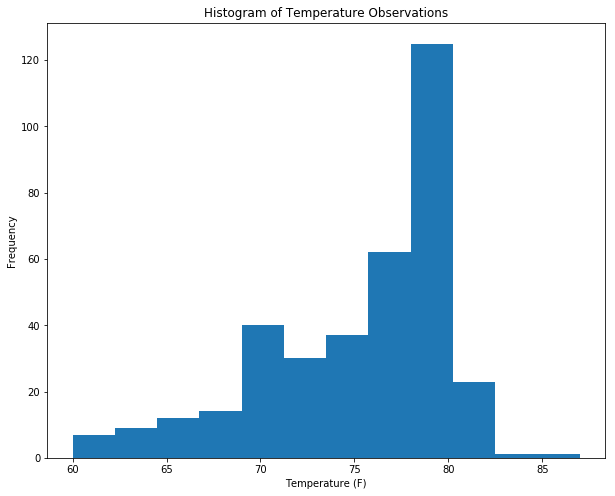

In [265]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(tobs_df[tobs_df['station'] == 'USC00519397']['tobs'],bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.title("Histogram of Temperature Observations")
plt.show()

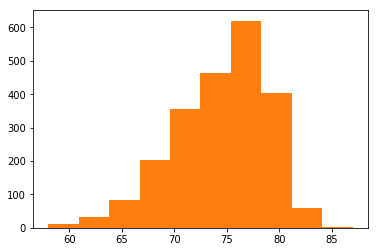

In [102]:
plt.hist(tobs_df['tobs'])
plt.show()

In [108]:
total_meas = session.query(Measurement).filter_by().all()

In [109]:
tot_station = []
tot_date = []
tot_prcp = []
tot_tobs = []
for row in total_meas:
    tot_date.append(row.date)
    tot_prcp.append(row.prcp)
    tot_tobs.append(row.tobs)
    tot_station.append(row.station)

In [111]:
tobs_date_df = pd.DataFrame(columns = ['date','station','prcp','tobs'])

In [112]:
tobs_date_df['station'] = tot_station
tobs_date_df['date'] = tot_date
tobs_date_df['tobs'] = tot_tobs
tobs_date_df['prcp'] = tot_prcp
len(tobs_date_df)

19550

In [161]:
tobs_date_df.head()

,date,station,prcp,tobs
0,2010-01-01,USC00519397,0.08,65.0
1,2010-01-02,USC00519397,0.00,63.0
2,2010-01-03,USC00519397,0.00,74.0
3,2010-01-04,USC00519397,0.00,76.0
4,2010-01-06,USC00519397,0.00,73.0


In [145]:
def calc_temps(date1, date2):
    mask = (tobs_date_df['date'] >= date1) & (tobs_date_df['date'] <= date2)
    fig, ax = plt.subplots(figsize = (5,8))
    ax.bar(x= [1], width = 1, height = tobs_date_df[mask]['tobs'].mean(), yerr = (tobs_date_df[mask]['tobs'].max()-tobs_date_df[mask]['tobs'].min()))
    ax.set_xticks([0,1,2])
    ax.tick_params(axis='x',which='both', labelbottom='off')
    ax.set_yticks([0,20,40,60,80,100])
    plt.title('Trip Average Temp', fontsize = 14)
    ax.set_ylabel('Temp (F)', fontsize = 12)
    plt.show()
    print('The trip average temperature is: %s degrees' % tobs_date_df[mask]['tobs'].mean())
    print('The trip max temperature is: %s degrees' % tobs_date_df[mask]['tobs'].max())
    print('The trip minimum temperature is: %s degrees' % tobs_date_df[mask]['tobs'].min())

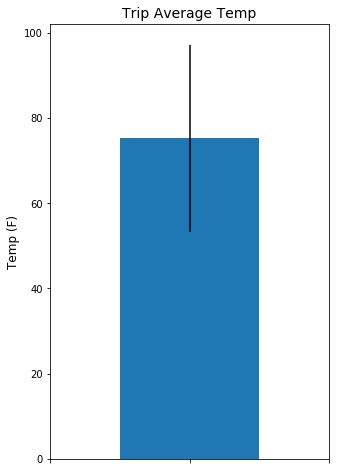

The trip average temperature is: 75.25555555555556 degrees
The trip max temperature is: 87.0 degrees
The trip minimum temperature is: 65.0 degrees


In [147]:
calc_temps('2017-05-01', '2017-06-01')

In [164]:
test_list = []
start = '2017-08-10'
total_meas = session.query(Measurement).filter(Measurement.date >= start).all()
for row in total_meas:
    test_dict = {}
    test_dict['Date'] = (row.date)
    test_dict['Station'] = row.station
    test_dict['prcp'] = (row.prcp)
    test_dict['tobs'] = (row.tobs)
    test_list.append(test_dict)

In [176]:
test_list[test_list[10]['Date'] >= start]

{'Date': '2017-08-11', 'Station': 'USC00519397', 'prcp': 0.0, 'tobs': 78.0}

In [256]:
start_q = session.query(Measurement.date, func.min(Measurement.tobs).label("Temp Min"),func.max(Measurement.tobs).label("Temp Max"),func.avg(Measurement.tobs).label("Temp Max"))\
.filter(Measurement.date >= '2017-08-10').group_by(Measurement.date).all()
test = list(np.ravel(start_q))
test_list = []
for row in start_q:
    test_dict = {}
    test_dict['Temps (Min, Max, Average)'] = row
    test_list.append(test_dict)

In [257]:
test_list

[{'Temps (Min, Max, Average)': ('2017-08-10', 75.0, 81.0, 79.25)},
 {'Temps (Min, Max, Average)': ('2017-08-11', 72.0, 81.0, 78.0)},
 {'Temps (Min, Max, Average)': ('2017-08-12', 74.0, 83.0, 79.0)},
 {'Temps (Min, Max, Average)': ('2017-08-13', 77.0, 84.0, 80.6)},
 {'Temps (Min, Max, Average)': ('2017-08-14', 75.0, 81.0, 78.2)},
 {'Temps (Min, Max, Average)': ('2017-08-15', 70.0, 82.0, 77.2)},
 {'Temps (Min, Max, Average)': ('2017-08-16', 71.0, 82.0, 77.0)},
 {'Temps (Min, Max, Average)': ('2017-08-17', 72.0, 83.0, 77.25)},
 {'Temps (Min, Max, Average)': ('2017-08-18', 76.0, 80.0, 78.0)},
 {'Temps (Min, Max, Average)': ('2017-08-19', 71.0, 85.0, 78.75)},
 {'Temps (Min, Max, Average)': ('2017-08-20', 78.0, 81.0, 79.66666666666667)},
 {'Temps (Min, Max, Average)': ('2017-08-21', 76.0, 82.0, 79.5)},
 {'Temps (Min, Max, Average)': ('2017-08-22', 76.0, 82.0, 80.0)},
 {'Temps (Min, Max, Average)': ('2017-08-23', 76.0, 82.0, 80.25)}]

In [255]:
jsonify(test)

['2017-08-10',
 '75.0',
 '81.0',
 '79.25',
 '2017-08-11',
 '72.0',
 '81.0',
 '78.0',
 '2017-08-12',
 '74.0',
 '83.0',
 '79.0',
 '2017-08-13',
 '77.0',
 '84.0',
 '80.6',
 '2017-08-14',
 '75.0',
 '81.0',
 '78.2',
 '2017-08-15',
 '70.0',
 '82.0',
 '77.2',
 '2017-08-16',
 '71.0',
 '82.0',
 '77.0',
 '2017-08-17',
 '72.0',
 '83.0',
 '77.25',
 '2017-08-18',
 '76.0',
 '80.0',
 '78.0',
 '2017-08-19',
 '71.0',
 '85.0',
 '78.75',
 '2017-08-20',
 '78.0',
 '81.0',
 '79.66666666666667',
 '2017-08-21',
 '76.0',
 '82.0',
 '79.5',
 '2017-08-22',
 '76.0',
 '82.0',
 '80.0',
 '2017-08-23',
 '76.0',
 '82.0',
 '80.25']